### Import library

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np  
import matplotlib.colors as mcolors
from PIL import ImageColor
import random


# I. EDA data from Youtube of Lipovitan

## 1.1 Import Dataset

In [118]:
clip_infor = pd.read_csv('Lipovitan YTB.csv')

df_clip = clip_infor.copy()

df_clip.head()

,video_id,channel_id,published_date,video_title,video_description,likes,views,comment_count
0,fozg9rJpsU8,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-24T01:12:28Z,LIPOVITAN - Nước Tăng Lực Mang Thương Hiệu Nhậ...,LIPOVITAN - Một trong những thương hiệu nước t...,22,7673,0
1,JYztFHcRxsU,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-08T09:21:47Z,⚡ Tết Rồng Phúc Quý – Năng Lượng Như Ý 🐲,"Tết đến cận kề, bầu không khí rộn ràng khắp ph...",11,2514,1
2,Fbdtn7S02jc,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-13T03:07:21Z,Tết 2024 | Việc Gì Khó Có Lipo,🌼 Tết 2024 | Việc Gì Khó Có Lipo 💪\n\nTết Nguy...,10,3431949,0
3,kIHx2mfqTRk,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-24T09:23:29Z,LIPOVITAN - Nước Tăng Lực Từ Nhật Bản,👍 LIPOVITAN – CHINH PHỤC BẠN SAU 3 LON\n⚡Bạn c...,39,15313,10
4,MlHc5U4Ki80,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-25T07:38:52Z,"TẾT 2024 | TẾT KHÔNG SỢ KHÓ, ĐÃ CÓ LIPO!","Tết đến nơi rồi, ôi dzồi ôi các anh mình ơi!!!...",1,601,0


In [119]:
df_clip.head(), df_clip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           157 non-null    object
 1   channel_id         157 non-null    object
 2   published_date     157 non-null    object
 3   video_title        157 non-null    object
 4   video_description  157 non-null    object
 5   likes              157 non-null    int64 
 6   views              157 non-null    int64 
 7   comment_count      157 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 9.9+ KB


(      video_id                channel_id        published_date  \
 0  fozg9rJpsU8  UC-NVmcQ2iV7c_F_vg92uyMg  2021-03-24T01:12:28Z   
 1  JYztFHcRxsU  UC-NVmcQ2iV7c_F_vg92uyMg  2023-12-08T09:21:47Z   
 2  Fbdtn7S02jc  UC-NVmcQ2iV7c_F_vg92uyMg  2023-12-13T03:07:21Z   
 3  kIHx2mfqTRk  UC-NVmcQ2iV7c_F_vg92uyMg  2021-03-24T09:23:29Z   
 4  MlHc5U4Ki80  UC-NVmcQ2iV7c_F_vg92uyMg  2023-12-25T07:38:52Z   
 
                                          video_title  \
 0  LIPOVITAN - Nước Tăng Lực Mang Thương Hiệu Nhậ...   
 1           ⚡ Tết Rồng Phúc Quý – Năng Lượng Như Ý 🐲   
 2                     Tết 2024 | Việc Gì Khó Có Lipo   
 3              LIPOVITAN - Nước Tăng Lực Từ Nhật Bản   
 4           TẾT 2024 | TẾT KHÔNG SỢ KHÓ, ĐÃ CÓ LIPO!   
 
                                    video_description  likes    views  \
 0  LIPOVITAN - Một trong những thương hiệu nước t...     22     7673   
 1  Tết đến cận kề, bầu không khí rộn ràng khắp ph...     11     2514   
 2  🌼 Tết 2024 | Việc Gì Khó Có L

## 1.2 Prepocessing

In [120]:
df_clip['published_date'] = pd.to_datetime(df_clip['published_date'])
df_clip['published_date'] = df_clip['published_date'].dt.strftime('%Y-%m-%d')
df_clip.head(15)

,video_id,channel_id,published_date,video_title,video_description,likes,views,comment_count
0,fozg9rJpsU8,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-24,LIPOVITAN - Nước Tăng Lực Mang Thương Hiệu Nhậ...,LIPOVITAN - Một trong những thương hiệu nước t...,22,7673,0
1,JYztFHcRxsU,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-08,⚡ Tết Rồng Phúc Quý – Năng Lượng Như Ý 🐲,"Tết đến cận kề, bầu không khí rộn ràng khắp ph...",11,2514,1
2,Fbdtn7S02jc,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-13,Tết 2024 | Việc Gì Khó Có Lipo,🌼 Tết 2024 | Việc Gì Khó Có Lipo 💪\n\nTết Nguy...,10,3431949,0
3,kIHx2mfqTRk,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-24,LIPOVITAN - Nước Tăng Lực Từ Nhật Bản,👍 LIPOVITAN – CHINH PHỤC BẠN SAU 3 LON\n⚡Bạn c...,39,15313,10
4,MlHc5U4Ki80,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-25,"TẾT 2024 | TẾT KHÔNG SỢ KHÓ, ĐÃ CÓ LIPO!","Tết đến nơi rồi, ôi dzồi ôi các anh mình ơi!!!...",1,601,0
5,GEOa7jzhbmo,UC-NVmcQ2iV7c_F_vg92uyMg,2023-04-17,LIPOVITAN - Năng Lượng Cho Cuộc Sống,"Với Vitamin nhóm B, Taurine, Inositol cùng vị ...",35,4521852,1
6,5pkEHAoERpY,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-31,LIPOVITAN - BẬT NẮP TRÚNG VÀNG - UỐNG LÀ TRÚNG!,LIPOVITAN – BẬT NẮP TRÚNG VÀNG\nUỐNG LÀ TRÚNG!...,50,6046472,2
7,Afe5ZF7Z22c,UC-NVmcQ2iV7c_F_vg92uyMg,2023-03-23,🔥 Lipovitan | Bật Nắp Trúng Vàng 2023 💥,🔥 Lipovitan | Bật Nắp Trúng Vàng 2023 💥\nChươn...,4,3393,1
8,HLVs4Iolx0k,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-31,LIPOVITAN - Bật nắp trúng vàng - Uống là trúng !,#LIPOVITAN – BẬT NẮP TRÚNG VÀNG \n\nƯU ĐÃI NGẬ...,29,10156,0
9,UGJastVGo1g,UC-NVmcQ2iV7c_F_vg92uyMg,2023-04-13,🔥 Lipovitan | Uống Càng Nhiều Trúng Càng Đã 💥,🔥 Lipovitan | Uống Càng Nhiều Trúng Càng Đã 💥 ...,11,4324220,0


In [121]:
duplicated_rows = df_clip.duplicated(subset='video_id').sum()
duplicated_rows

# Display duplicate rows based on 'video_id'
duplicates = df_clip[df_clip.duplicated(subset='video_id')]
duplicates

,video_id,channel_id,published_date,video_title,video_description,likes,views,comment_count
45,hNKktMJ3d4s,UC-NVmcQ2iV7c_F_vg92uyMg,2022-04-01,BẬT NẮP TRÚNG VÀNG - UỐNG CÀNG NHIỀU TRÚNG CÀN...,🛵 20 Giải Đặc Biệt: mỗi giải 01 Xe Máy Honda ...,25,4135318,10
46,fozg9rJpsU8,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-24,LIPOVITAN - Nước Tăng Lực Mang Thương Hiệu Nhậ...,LIPOVITAN - Một trong những thương hiệu nước t...,22,7673,0
47,MlHc5U4Ki80,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-25,"TẾT 2024 | TẾT KHÔNG SỢ KHÓ, ĐÃ CÓ LIPO!","Tết đến nơi rồi, ôi dzồi ôi các anh mình ơi!!!...",1,601,0
48,GEOa7jzhbmo,UC-NVmcQ2iV7c_F_vg92uyMg,2023-04-17,LIPOVITAN - Năng Lượng Cho Cuộc Sống,"Với Vitamin nhóm B, Taurine, Inositol cùng vị ...",35,4521852,1
49,5pkEHAoERpY,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-31,LIPOVITAN - BẬT NẮP TRÚNG VÀNG - UỐNG LÀ TRÚNG!,LIPOVITAN – BẬT NẮP TRÚNG VÀNG\nUỐNG LÀ TRÚNG!...,50,6046472,2
...,...,...,...,...,...,...,...,...
152,wuBUERNID60,UC-NVmcQ2iV7c_F_vg92uyMg,2022-11-22,LIPOVITAN – TẾT TRÀN NĂNG LƯỢNG | SOUTH 30S,LIPOVITAN – TẾT TRÀN NĂNG LƯỢNG\nMột năm mới s...,34,2821623,0
153,XCvVcYPFr6A,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-28,"Tết 2024 | Việc Gì Khó, Có Lipo!",🌼 Tết 2024 | Việc Gì Khó Có Lipo 💪\n\nTết Nguy...,1557,7423692,2
154,ZfPVYRI9e6Y,UC-NVmcQ2iV7c_F_vg92uyMg,2022-10-14,🚚 1 LON NƯỚC NHỎ - 1 CỘNG ĐỒNG TO | VIẾT TIẾP ...,🚚 1 LON NƯỚC NHỎ - 1 CỘNG ĐỒNG TO | VIẾT TIẾP ...,0,546,0
155,lv0VclZJTHQ,UC-NVmcQ2iV7c_F_vg92uyMg,2023-10-05,"Cùng Ha Mid và Lipovitan với hành trình ""Năng ...",#lipovitan #nuoctangluc #nuoctangluclipovitan ...,0,254,0


In [122]:
# Count the number of rows before removing duplicates
print(f"Number of rows before removing duplicates: {len(df_clip)}")

# Remove duplicate rows
df_clip = df_clip.drop_duplicates(subset='video_id')

# Count the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(df_clip)}")

df_clip.head()

Number of rows before removing duplicates: 157
Number of rows after removing duplicates: 46


,video_id,channel_id,published_date,video_title,video_description,likes,views,comment_count
0,fozg9rJpsU8,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-24,LIPOVITAN - Nước Tăng Lực Mang Thương Hiệu Nhậ...,LIPOVITAN - Một trong những thương hiệu nước t...,22,7673,0
1,JYztFHcRxsU,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-08,⚡ Tết Rồng Phúc Quý – Năng Lượng Như Ý 🐲,"Tết đến cận kề, bầu không khí rộn ràng khắp ph...",11,2514,1
2,Fbdtn7S02jc,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-13,Tết 2024 | Việc Gì Khó Có Lipo,🌼 Tết 2024 | Việc Gì Khó Có Lipo 💪\n\nTết Nguy...,10,3431949,0
3,kIHx2mfqTRk,UC-NVmcQ2iV7c_F_vg92uyMg,2021-03-24,LIPOVITAN - Nước Tăng Lực Từ Nhật Bản,👍 LIPOVITAN – CHINH PHỤC BẠN SAU 3 LON\n⚡Bạn c...,39,15313,10
4,MlHc5U4Ki80,UC-NVmcQ2iV7c_F_vg92uyMg,2023-12-25,"TẾT 2024 | TẾT KHÔNG SỢ KHÓ, ĐÃ CÓ LIPO!","Tết đến nơi rồi, ôi dzồi ôi các anh mình ơi!!!...",1,601,0


## 1.3 EDA

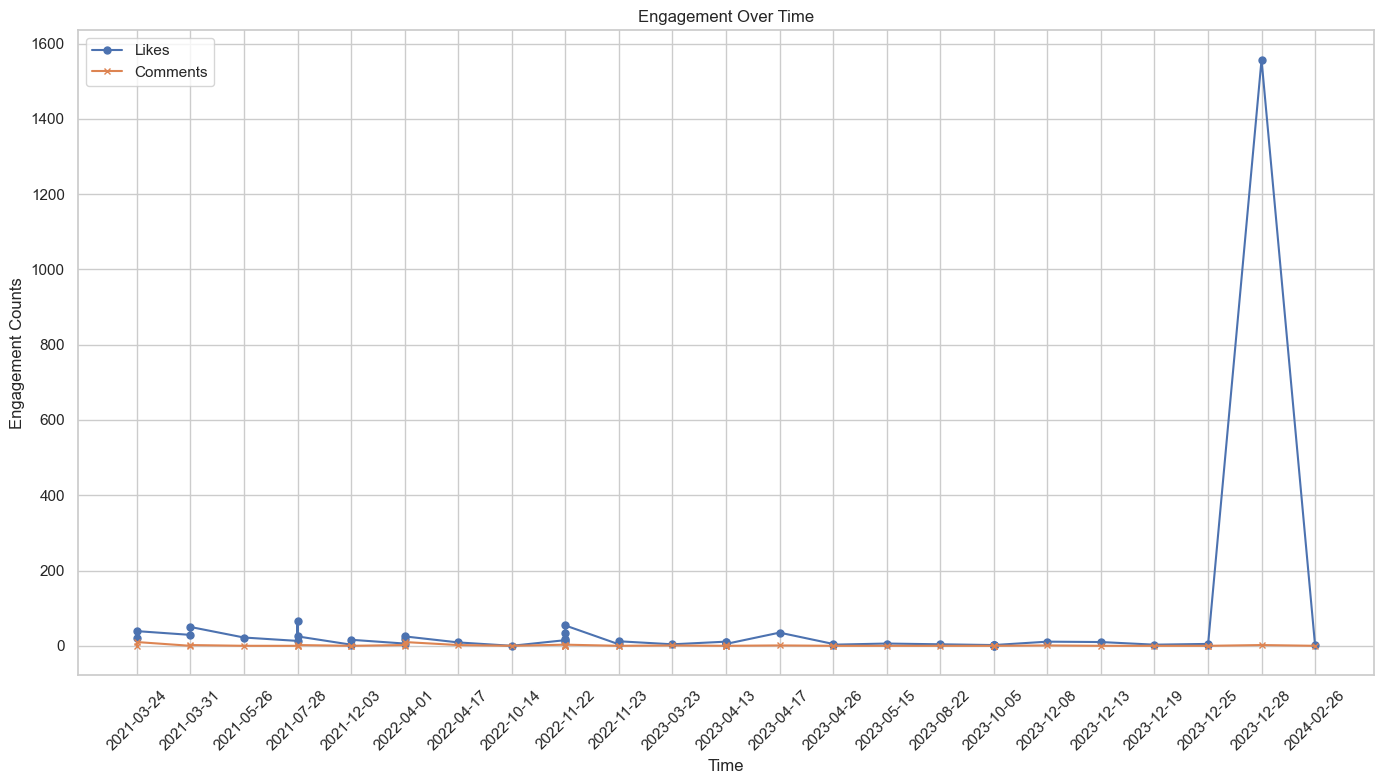

In [123]:


# Set the style of seaborn
sns.set(style="whitegrid")

# Ensure the data is sorted by Time
data_sorted = df_clip.sort_values('published_date')

# Plotting the engagement over time
plt.figure(figsize=(14, 8))

# Plot likes
plt.plot(data_sorted['published_date'], data_sorted['likes'], label='Likes', marker='o', linestyle='-', markersize=5)
# Plot comments
plt.plot(data_sorted['published_date'], data_sorted['comment_count'], label='Comments', marker='x', linestyle='-', markersize=5)


plt.title('Engagement Over Time')
plt.xlabel('Time')
plt.ylabel('Engagement Counts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


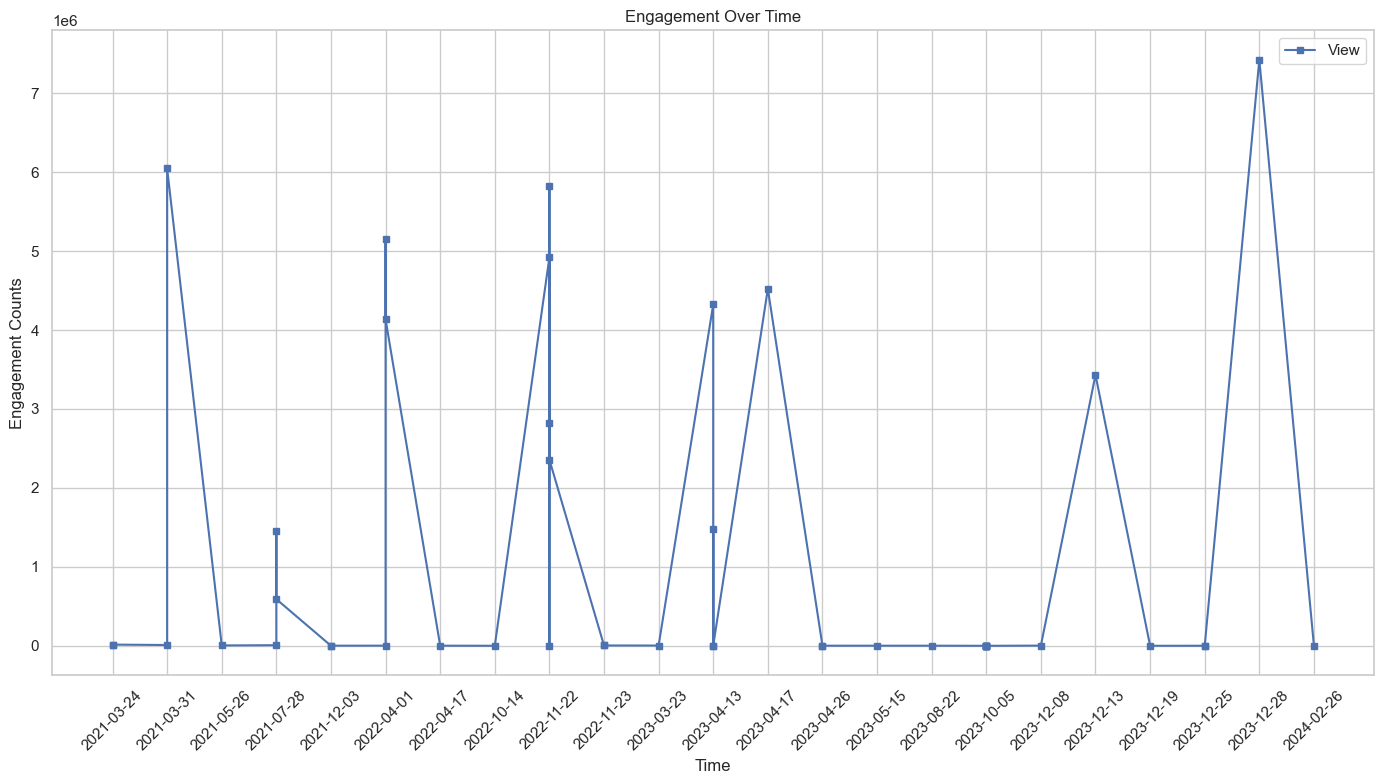

In [124]:


# Set the style of seaborn
sns.set(style="whitegrid")

# Ensure the data is sorted by Time
data_sorted = df_clip.sort_values('published_date')

# Plotting the engagement over time
plt.figure(figsize=(14, 8))


plt.plot(data_sorted['published_date'], data_sorted['views'], label='View', marker='s', linestyle='-', markersize=5)

plt.title('Engagement Over Time')
plt.xlabel('Time')
plt.ylabel('Engagement Counts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


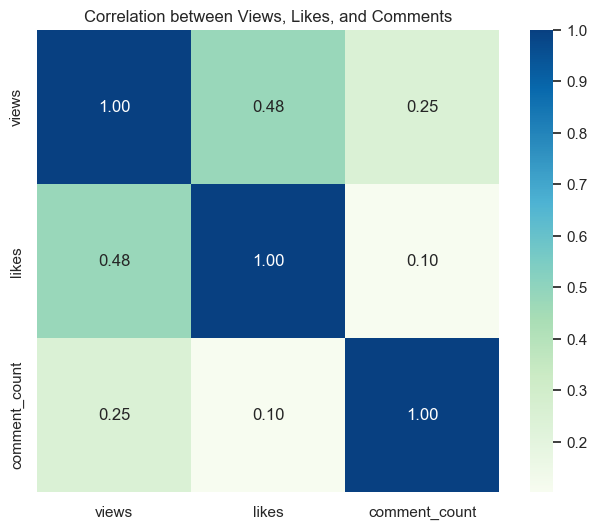

In [125]:
# Calculate correlation matrix
corr = df_clip[['views', 'likes', 'comment_count']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='GnBu', cbar=True, square=True)

plt.title('Correlation between Views, Likes, and Comments')
plt.show()

In [126]:

# Create a new column 'total_engagement' as the sum of 'likes', 'views', and 'comment_count'
df_clip['total_engagement'] = df_clip['likes'] + df_clip['views'] + df_clip['comment_count']

# Find the video with the highest total engagement
top_video = df_clip[df_clip['total_engagement'] == df_clip['total_engagement'].max()]

# Get the 'title' and 'description' of the top video
top_title = top_video['video_title'].values[0]
top_description = top_video['video_description'].values[0]

# Create a new column 'total_engagement' as the sum of 'likes', 'views', and 'comment_count'
df_clip['total_engagement'] = df_clip['likes'] + df_clip['views'] + df_clip['comment_count']

# Sort the DataFrame by 'total_engagement' in descending order and get the top 5 videos
top_videos = df_clip.sort_values('total_engagement', ascending=False).head(5)

df_top5= top_videos[['video_title','video_description', 'total_engagement']]
df_top5



,video_title,video_description,total_engagement
15,"Tết 2024 | Việc Gì Khó, Có Lipo!",🌼 Tết 2024 | Việc Gì Khó Có Lipo 💪\n\nTết Nguy...,7425251
6,LIPOVITAN - BẬT NẮP TRÚNG VÀNG - UỐNG LÀ TRÚNG!,LIPOVITAN – BẬT NẮP TRÚNG VÀNG\nUỐNG LÀ TRÚNG!...,6046524
44,Lipovitan–Cho Đời Sang Trang–Tết Tràn Năng Lượ...,Lipovitan – Cho Đời Sang Trang – Tết Tràn Năng...,5824516
12,BẬT NẮP TRÚNG VÀNG - UỐNG CÀNG NHIỀU TRÚNG CÀN...,🛵 20 Giải Đặc Biệt: mỗi giải 01 Xe Máy Honda ...,5149109
10,Lipovitan–Cho Đời Sang Trang–Tết Tràn Năng Lượ...,Lipovitan – Cho Đời Sang Trang – Tết Tràn Năng...,4920883


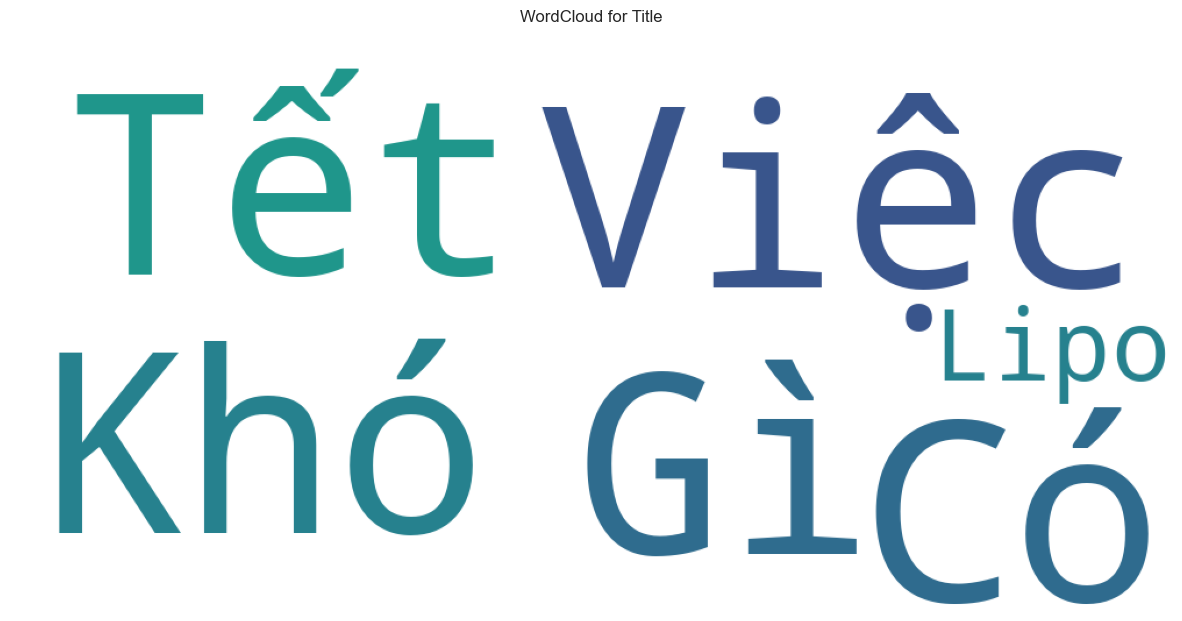

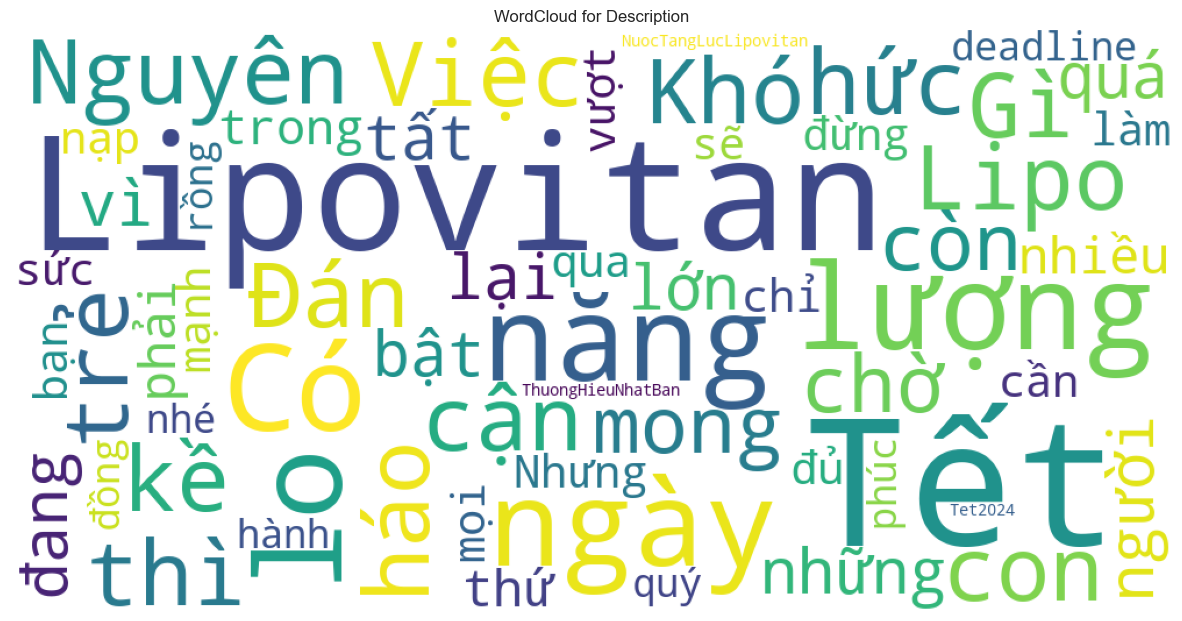

In [127]:
# Create WordCloud for 'title' with white background
wordcloud_title = WordCloud(background_color='white', width = 1000, height = 500).generate(top_title)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_title)
plt.title('WordCloud for Title')
plt.axis("off")
plt.show()

# Create WordCloud for 'description' with white background
wordcloud_description = WordCloud(background_color='white', width = 1000, height = 500).generate(top_description)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_description)
plt.title('WordCloud for Description')
plt.axis("off")
plt.show()

# II. NLP and Sentiment Analysis 

## 2.1 Import Dataset

In [128]:
clip_cmt = pd.read_csv('Lipovitan comment ytb.csv')

df_cmt = clip_cmt.copy()

df_cmt.head(10)

,Video ID,Comment
0,JYztFHcRxsU,Quảng cáo nhạc cuốn quá bị lôi vào đây tìm cho...
1,kIHx2mfqTRk,2 danh thủ của bóng đá Việt Nam là:Trần Công M...
2,kIHx2mfqTRk,Nước này ở 1 số tiệm tạp hóa vẫn bán nè
3,kIHx2mfqTRk,Phan văn tài em 👍
4,kIHx2mfqTRk,Quảng cáo ngày xưa ngầu thực sự
5,GEOa7jzhbmo,"RỒNG KHÔNG CÓ THẬT, RỒNG LÀ BIỂU TƯỢNG CỦA MA ..."
6,5pkEHAoERpY,Cho tui hỏi bật nắp có mã gửi sốnaof ạ?
7,Afe5ZF7Z22c,Có thât ko
8,JLQwoGoU_QA,Trúng rồi lãnh thưởng ở đâu vậy
9,JLQwoGoU_QA,"Vần ênh hay uênh.\nlông lênh, huênh hoang,\nco..."


In [129]:
df_cmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Video ID  24 non-null     object
 1   Comment   24 non-null     object
dtypes: object(2)
memory usage: 512.0+ bytes


In [130]:
df_cmt.describe()

,Video ID,Comment
count,24,24
unique,13,24
top,hNKktMJ3d4s,Quảng cáo nhạc cuốn quá bị lôi vào đây tìm cho...
freq,5,1


## 2.2 Prepocessing

In [131]:
duplicated_rows_cmt = df_cmt.duplicated(subset='Comment').sum()
duplicated_rows_cmt

0

## 2.3 NLP and Sentiment Anaalysis

In [132]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.nn.functional import softmax
import torch

# Khởi tạo tokenizer và mô hình từ mô hình bạn đã tìm thấy trên Hugging Face
tokenizer = AutoTokenizer.from_pretrained("hieudinhpro/BERT_Sentiment_Vietnamese")
model = AutoModelForSequenceClassification.from_pretrained("hieudinhpro/BERT_Sentiment_Vietnamese")

# Hàm phân tích cảm xúc cho mỗi bình luận
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=256)
    with torch.no_grad():  # Không cần tính gradient
        outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=1)
    sentiment = torch.argmax(probs, dim=1).numpy()[0]
    # Cần cập nhật ánh xạ nhãn nếu cần, tùy thuộc vào cách mô hình được huấn luyện
    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_mapping[sentiment]

# Áp dụng hàm phân tích cảm xúc lên cột bình luận
df_cmt['sentiment'] = df_cmt['Comment'].apply(analyze_sentiment)

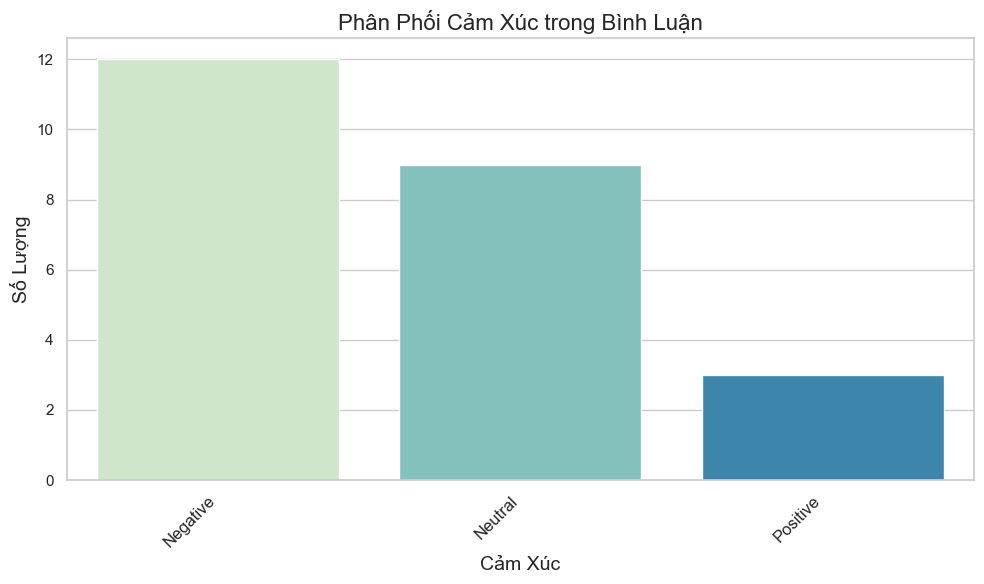

In [144]:
# Thiết lập màu sắc cho biểu đồ
colors = sns.color_palette('GnBu', n_colors=3)

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_cmt, order=df_cmt['sentiment'].value_counts().index, palette=colors)

# Tiêu đề và phụ đề
plt.title('Phân Phối Cảm Xúc trong Bình Luận', fontsize=16)
plt.xlabel('Cảm Xúc', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

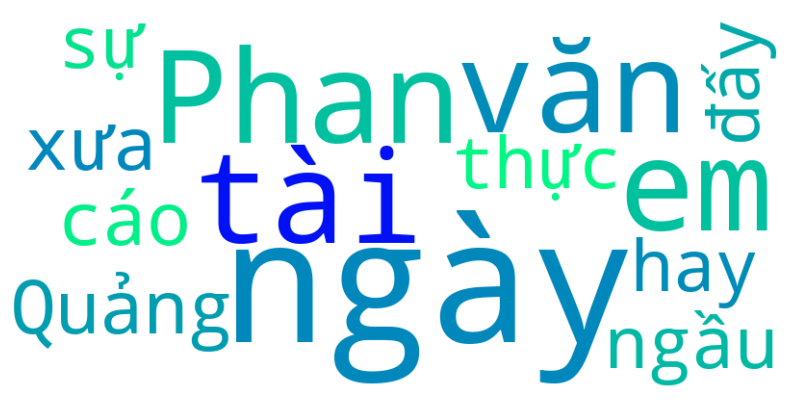

In [155]:
# Lọc các bình luận tích cực
positive_comments = df_cmt[df_cmt['sentiment'] == 'Positive']['Comment']

# Kết hợp tất cả các bình luận tích cực thành một chuỗi dài
all_positive_comments = ' '.join(comment for comment in positive_comments)

# Tạo một đối tượng WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', colormap ='winter').generate(all_positive_comments)

# Hiển thị WordCloud bằng matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

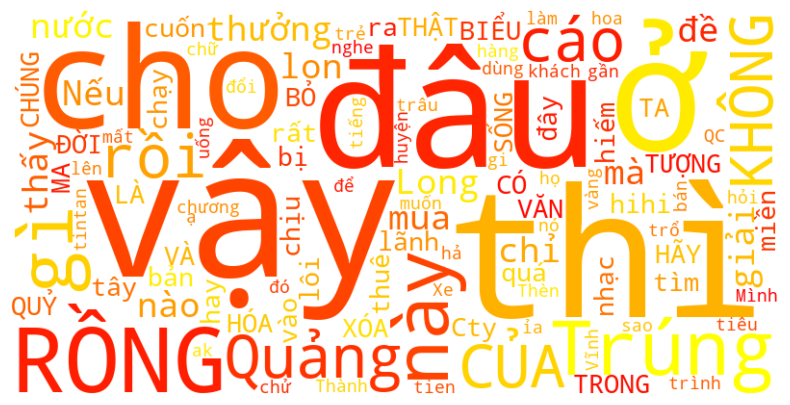

In [146]:
# Lọc các bình luận tiêu cực
negative_comments = df_cmt[df_cmt['sentiment'] == 'Negative']['Comment']

# Kết hợp tất cả các bình luận tiêu cực thành một chuỗi dài
all_negative_comments = ' '.join(comment for comment in negative_comments)

# Tạo một đối tượng WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', colormap='autumn').generate(all_negative_comments)

# Hiển thị WordCloud bằng matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()